In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle

In [12]:
models_dir = "models"
with open(os.path.join(models_dir, "results.pkl"), "rb") as f:
    results = pickle.load(f)

In [13]:
rows = []
for key, res in results.items():
    if isinstance(key, tuple):
        mode, lambda_cnt = key
    else:
        mode, lambda_cnt = key, None

    m = res["metrics"]
    rows.append({
        "mode": mode,
        "lambda_cnt": lambda_cnt,
        "acc": m["acc"],
        "macro_f1": m["macro_f1"],
        "pair_acc": m["pair_acc"],
        "overall_rmse": m["overall_rmse"],
        "overall_mae": m["overall_mae"],
    })

summary_df = pd.DataFrame(rows)
summary_df

,mode,lambda_cnt,acc,macro_f1,pair_acc,overall_rmse,overall_mae
0,cls_only,NaN,0.512,0.484160,0.943,3.227111,1.967587
1,reg_only,NaN,0.000,0.000000,0.023,0.555031,0.310106
2,multitask,0.3,0.521,0.500198,0.953,0.603445,0.362489
3,multitask,0.5,0.514,0.479209,0.952,0.556717,0.331825
4,multitask,1.0,0.484,0.451804,0.947,0.565997,0.321276


In [14]:
rows = []
index = []
shape_classes = ["square", "circle", "up", "right", "down", "left"]

for key, res in results.items():
    if isinstance(key, tuple):
        mode, lambda_cnt = key
    else:
        mode, lambda_cnt = key, None

    m = res["metrics"]
    rmse_vals = m["rmse_per_class"]
    mae_vals = m["mae_per_class"]

    index.append((mode, lambda_cnt, "rmse"))
    rows.append(rmse_vals)

    index.append((mode, lambda_cnt, "mae"))
    rows.append(mae_vals)

multi_index = pd.MultiIndex.from_tuples(
    index, names=["mode", "lambda_cnt", "metric"]
)

per_class_all_df = pd.DataFrame(rows, index=multi_index, columns=shape_classes)
per_class_all_df

square    circle        up     right      down  \
mode      lambda_cnt metric                                                     
cls_only  NaN        rmse    3.232230  3.231872  3.081489  3.264037  3.351954   
                     mae     1.842229  1.929957  1.932230  2.016113  2.092735   
reg_only  NaN        rmse    0.493037  0.518851  0.567983  0.576263  0.597764   
                     mae     0.272868  0.287205  0.330152  0.316750  0.330403   
multitask 0.3        rmse    0.562643  0.542255  0.627187  0.628602  0.587812   
                     mae     0.330322  0.334682  0.376867  0.381350  0.353974   
          0.5        rmse    0.457882  0.483160  0.572682  0.621271  0.543185   
                     mae     0.281478  0.298742  0.365966  0.344846  0.326820   
          1.0        rmse    0.468261  0.481929  0.590815  0.605099  0.584597   
                     mae     0.271319  0.292018  0.330455  0.338329  0.328324   

                                 left  
mode      lambda_cnt metric            
cls_only  NaN        rmse    3.195007  
                     mae     1.992254  
reg_only  NaN        rmse    0.569265  
                     mae     0.323255  
multitask 0.3        rmse    0.663504  
                     mae     0.397741  
          0.5        rmse    0.638364  
                     mae     0.373100  
          1.0        rmse    0.643142  
                     mae     0.367208

In [15]:
def plot_history(history, mode, title_prefix=""):
    epochs = range(1, len(history["train_loss"]) + 1)

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(epochs, history["train_loss"], label="Train loss")
    ax.plot(epochs, history["eval_loss"], label="Val loss")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.set_title(f"{title_prefix}Loss over epochs")
    ax.legend()
    ax.grid(True)
    fig.tight_layout()
    plt.show()

    if mode != "reg_only":
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(epochs, history["eval_acc"])
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Accuracy")
        ax.set_title(f"{title_prefix}Validation accuracy over epochs")
        ax.grid(True)
        fig.tight_layout()
        plt.show()

    if mode != "cls_only":
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(epochs, history["eval_rmse"])
        ax.set_xlabel("Epoch")
        ax.set_ylabel("RMSE")
        ax.set_title(f"{title_prefix}Validation RMSE over epochs")
        ax.grid(True)
        fig.tight_layout()
        plt.show()


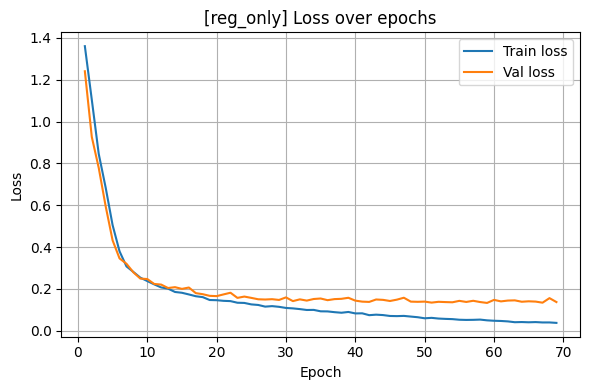

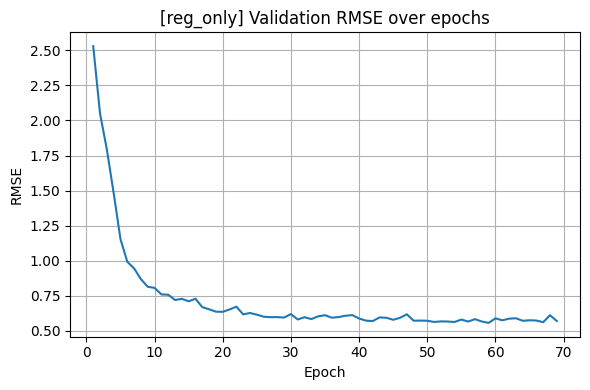

In [16]:
plot_history(results["reg_only"]["history"], mode="reg_only", title_prefix="[reg_only] ")

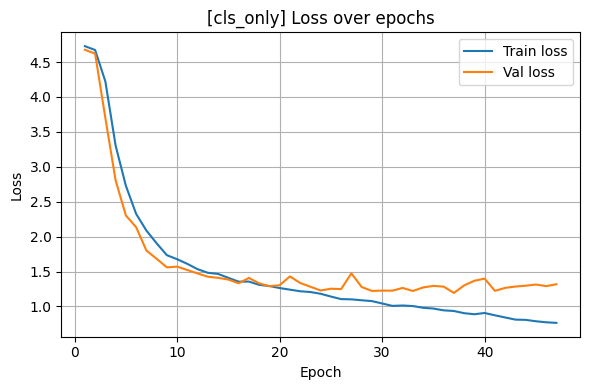

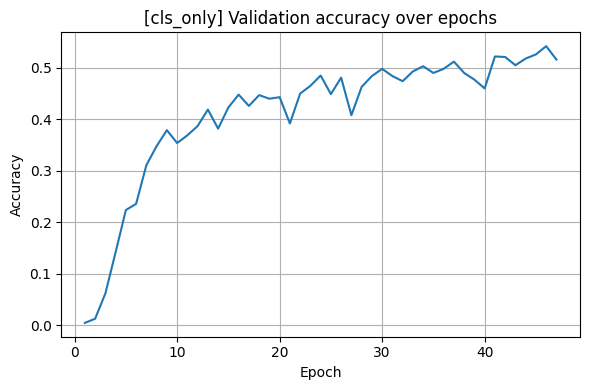

In [17]:
plot_history(results["cls_only"]["history"], mode="cls_only", title_prefix="[cls_only] ")

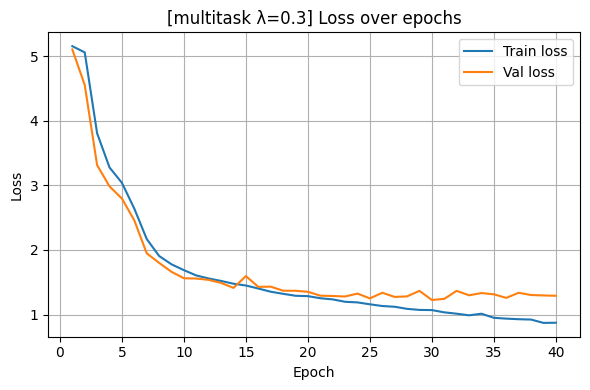

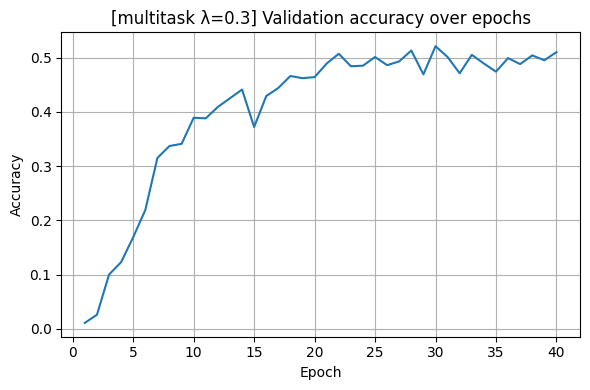

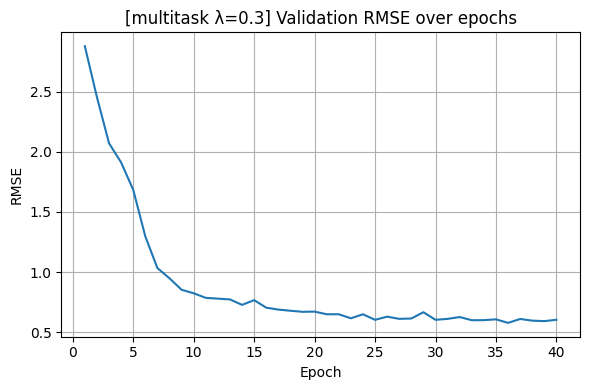

In [18]:
plot_history(results[("multitask", 0.3)]["history"], mode="multitask", title_prefix="[multitask λ=0.3] ")

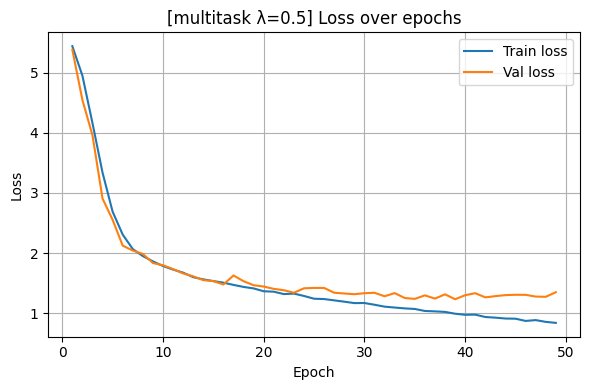

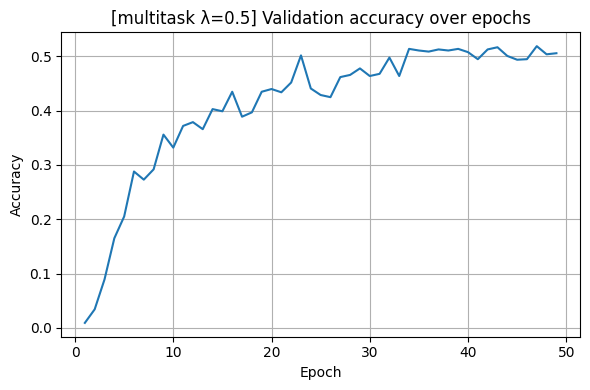

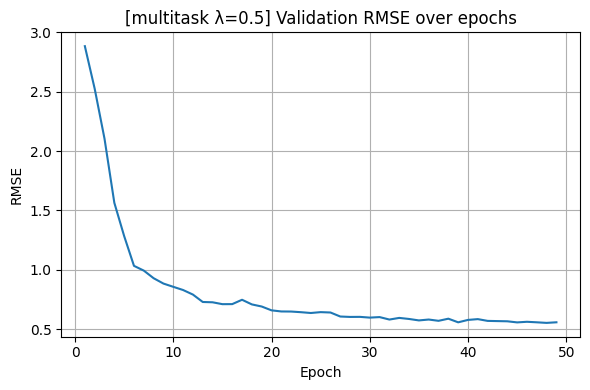

In [19]:
plot_history(results[("multitask", 0.5)]["history"], mode="multitask", title_prefix="[multitask λ=0.5] ")

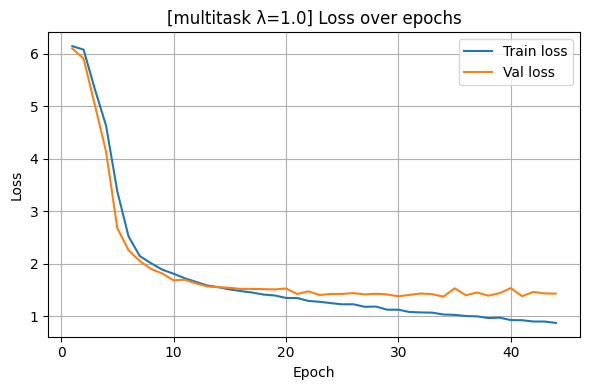

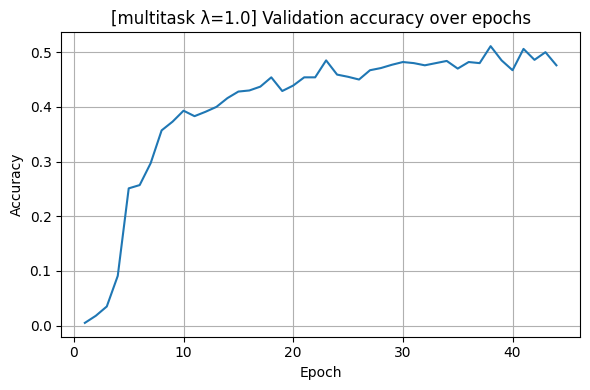

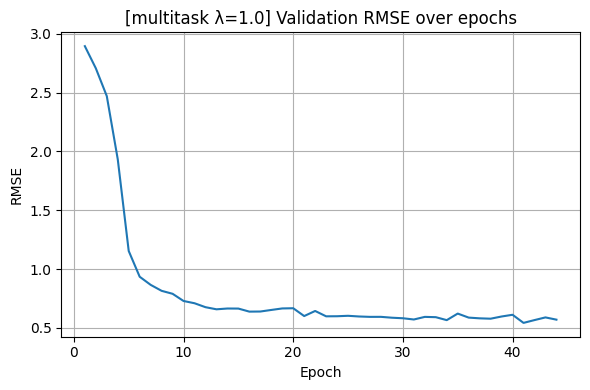

In [20]:
plot_history(results[("multitask", 1.0)]["history"], mode="multitask", title_prefix="[multitask λ=1.0] ")